In [5]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import glob
import os

In [7]:
train_data = pd.read_csv('./dataset/GAN_train.csv')

In [8]:
train_data.shape

(500, 17)

In [9]:
#train_data = train_data.values.reshape(train_data.shape[0],train_data.shape[1],1)

In [10]:
train_data.shape

(500, 17)

In [11]:
train_data = train_data.astype('float32')


In [12]:
train_data['a1'].fillna((train_data['a1'].mean()), inplace= True)
train_data['a2'].fillna((train_data['a2'].mean()), inplace= True)
train_data['a3'].fillna((train_data['a3'].mean()), inplace= True)
train_data['a4'].fillna((train_data['a4'].mean()), inplace= True)
train_data['a5'].fillna((train_data['a5'].mean()), inplace= True)
train_data['b1'].fillna((train_data['b1'].mean()), inplace= True)
train_data['b2'].fillna((train_data['b2'].mean()), inplace= True)
train_data['b3'].fillna((train_data['b3'].mean()), inplace= True)
train_data['b4'].fillna((train_data['b4'].mean()), inplace= True)
train_data['b5'].fillna((train_data['b5'].mean()), inplace= True)
train_data['b6'].fillna((train_data['b6'].mean()), inplace= True)
train_data['b7'].fillna((train_data['b7'].mean()), inplace= True)
train_data['b8'].fillna((train_data['b8'].mean()), inplace= True)
train_data['b9'].fillna((train_data['b9'].mean()), inplace= True)
train_data['b10'].fillna((train_data['b10'].mean()), inplace= True)
train_data['b11'].fillna((train_data['b11'].mean()), inplace= True)
train_data['b12'].fillna((train_data['b12'].mean()), inplace= True)




In [13]:
train_data


,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12
0,35.0,17.0,93.0,5.0,53.0,1.0,4.0,1.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0
1,21.0,-5.0,79.0,71.0,28.0,0.0,5.0,-1.0,-1.0,0.0,5.0,2.0,3.0,0.0,3.0,2.0,1.0
2,35.0,17.0,65.0,5.0,59.0,0.0,5.0,-1.0,-1.0,0.0,5.0,0.0,5.0,1.0,4.0,4.0,0.0
3,80.0,-1.0,9.0,74.0,59.0,0.0,5.0,-1.0,-1.0,1.0,4.0,1.0,3.0,0.0,3.0,2.0,1.0
4,92.0,62.0,50.0,90.0,76.0,2.0,3.0,2.0,0.0,0.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,64.0,86.0,93.0,103.0,-1.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0
496,78.0,93.0,103.0,-5.0,30.0,2.0,3.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,2.0,1.0,1.0
497,88.0,102.0,-3.0,20.0,60.0,1.0,4.0,0.0,1.0,1.0,3.0,0.0,3.0,0.0,3.0,2.0,1.0
498,92.0,-3.0,13.0,61.0,77.0,1.0,4.0,1.0,0.0,0.0,4.0,0.0,4.0,2.0,2.0,1.0,1.0


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
scaler.fit(train_data)

MinMaxScaler()

In [16]:
scaled_train_data = scaler.transform(train_data)

In [17]:
scaled_train_data

array([[0.36363634, 0.2       , 0.8909091 , ..., 0.8333334 , 0.8333334 ,
        0.16666667],
       [0.23636363, 0.        , 0.76363635, ..., 0.6666667 , 0.5       ,
        0.33333334],
       [0.36363634, 0.2       , 0.6363636 , ..., 0.8333334 , 0.8333334 ,
        0.16666667],
       ...,
       [0.8454545 , 0.97272724, 0.01818182, ..., 0.6666667 , 0.5       ,
        0.33333334],
       [0.8818182 , 0.01818182, 0.16363636, ..., 0.5       , 0.33333334,
        0.33333334],
       [0.96363634, 0.3454545 , 0.6       , ..., 0.33333334, 0.33333334,
        0.16666667]], dtype=float32)

In [18]:
train_data_MinMax = pd.DataFrame(data=scaled_train_data, columns=["a1", "a2","a3","a4","a5","b1","b2","b3","b4","b5","b6","b7","b8","b9","b10","b11","b12"])
train_data_MinMax

,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12
0,0.363636,0.200000,0.890909,0.090909,0.527273,0.2,0.8,0.333333,0.166667,0.166667,0.833333,0.166667,0.833333,0.166667,0.833333,0.833333,0.166667
1,0.236364,0.000000,0.763636,0.690909,0.300000,0.0,1.0,0.000000,0.000000,0.166667,1.000000,0.500000,0.666667,0.166667,0.666667,0.500000,0.333333
2,0.363636,0.200000,0.636364,0.090909,0.581818,0.0,1.0,0.000000,0.000000,0.166667,1.000000,0.166667,1.000000,0.333333,0.833333,0.833333,0.166667
3,0.772727,0.036364,0.127273,0.718182,0.581818,0.0,1.0,0.000000,0.000000,0.333333,0.833333,0.333333,0.666667,0.166667,0.666667,0.500000,0.333333
4,0.881818,0.609091,0.500000,0.863636,0.736364,0.4,0.6,0.500000,0.166667,0.166667,0.666667,0.333333,0.500000,0.333333,0.333333,0.333333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.627273,0.827273,0.890909,0.981818,0.036364,0.4,0.6,0.333333,0.333333,0.333333,0.500000,0.166667,0.500000,0.333333,0.333333,0.166667,0.333333
496,0.754545,0.890909,0.981818,0.000000,0.318182,0.4,0.6,0.333333,0.333333,0.166667,0.666667,0.333333,0.500000,0.166667,0.500000,0.333333,0.333333
497,0.845455,0.972727,0.018182,0.227273,0.590909,0.2,0.8,0.166667,0.333333,0.333333,0.666667,0.166667,0.666667,0.166667,0.666667,0.500000,0.333333
498,0.881818,0.018182,0.163636,0.600000,0.745455,0.2,0.8,0.333333,0.166667,0.166667,0.833333,0.166667,0.833333,0.500000,0.500000,0.333333,0.333333


In [19]:
train_data_MinMax = train_data_MinMax.values.reshape(train_data.shape[0],train_data.shape[1],1)

In [20]:
train_data_MinMax.shape


(500, 17, 1)

In [21]:
train_data_MinMax.dtype


dtype('float32')

In [808]:
BATCH_SIZE = 128
BUFFER_SIZE = 500

In [809]:
Datasets = tf.data.Dataset.from_tensor_slices(train_data_MinMax)

In [810]:
datasets = Datasets.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [811]:
datasets

<BatchDataset shapes: (None, 17, 1), types: tf.float32>

In [924]:
def generator_model():
    model = keras.Sequential()
    model.add(layers.Dense(64, input_shape=(27,), use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(64, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(17*1, use_bias=False, activation=tf.nn.sigmoid))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Reshape((17, 1)))
    
    return model

In [916]:
def discriminator_model():
    model = keras.Sequential()
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(1, activation=tf.nn.sigmoid))
    
    return model

In [917]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [904]:
def discriminator_loss(real_pred, fake_pred):
    real_loss = cross_entropy(tf.ones_like(real_pred), real_pred)
    fake_loss = cross_entropy(tf.zeros_like(fake_pred), fake_pred)
    return real_loss + fake_loss

In [905]:
def generator_loss(fake_pred):
    return cross_entropy(tf.ones_like(fake_pred), fake_pred)

In [925]:
g_optimizer = keras.optimizers.Adam(0.01)
d_optimizer = keras.optimizers.Adam(0.01)

In [926]:
EPOCHS = 100

noise_dim = 15

num_examples_to_generate = 16

In [927]:
def Noise(size):
    input_noise = tf.random.uniform([size, noise_dim])
    path_noise = tf.constant([[0.333333]], dtype=tf.float32)
    path_noise = tf.tile(path_noise, [size, 12])
    noise = tf.concat([input_noise, path_noise], 1)
    
    return noise

noize: random(10)  0.333333(12)

In [928]:
generator = generator_model()
discriminator= discriminator_model()

In [929]:
def d_train_step(data):
    noise = Noise(BATCH_SIZE)
    #tf.print('train_noise:', noise)
    with tf.GradientTape() as d_tape:
        real_pred = discriminator(data, training=True)
        
        fake_data = generator(noise, training=False)
        fake_pred = discriminator(fake_data, training=True)
        
        d_loss = discriminator_loss(real_pred, fake_pred)
        
        #tf.print('real_pred:', real_pred, '   fake_pred:', fake_pred, '  d_loss: ', d_loss)
        
    d_gradients = d_tape.gradient(d_loss, discriminator.trainable_variables)
    d_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_variables))
    
    return d_loss
    

In [930]:
def g_train_step():
    noise = Noise(BATCH_SIZE)
    #tf.print('train_noise:', noise)
    with tf.GradientTape() as g_tape:
        
        fake_data = generator(noise, training=True)
        fake_pred = discriminator(fake_data, training=False)
        
        g_loss = generator_loss(fake_pred)
    
        #tf.print('  fake_pred:', fake_pred)
        
    
    g_gradients = g_tape.gradient(g_loss, generator.trainable_variables)
    g_optimizer.apply_gradients(zip(g_gradients, generator.trainable_variables))
    
    return g_loss
    

In [931]:
def generate_print_data(g_model):
    test_noise = Noise(num_examples_to_generate)
    pre_data = g_model(test_noise, training=False)
    fake_pred = discriminator(pre_data, training=False)
    tf.print('fake pred use trained d:', fake_pred)
    #tf.print('pre_data:', pre_data)
    pre_data = tf.reshape(pre_data, [pre_data.shape[0], pre_data.shape[1]])
    pre_data = scaler.inverse_transform(pre_data)
    pre_data = pre_data.astype('int32')
    pre_data = pd.DataFrame(data=pre_data, columns=["a1", "a2","a3","a4","a5","b1","b2","b3","b4","b5","b6","b7","b8","b9","b10","b11","b12"])
    print(pre_data)

In [932]:
def train(dataset, epochs):
    gloss = []
    dloss = []
    gIteration=[]
    dIteration=[]
    for epoch in range(epochs):
        gIteration.append(epoch)
        print('epoch {}/{}'.format(epoch, epochs))
        for data_batch in dataset:
            #iteration.append(data_batch)
            d_loss = d_train_step(data_batch)
            dloss.append(d_loss.numpy())
            dIteration.append(len(dloss))
        g_loss = g_train_step()
        gloss.append(g_loss.numpy())
        generate_print_data(generator)
    
    if epoch == epochs-1:
        plt.xlabel('epoch')
        plt.ylabel('gloss')
        plt.plot(gIteration, gloss, label='gloss')
        plt.show()
        plt.xlabel('epoch')
        plt.ylabel('dloss')
        plt.plot(dIteration, dloss, label='dloss')
        plt.show()


epoch 0/100
fake pred use trained d: [[[0.417652518]
  [0.41066128]
  [0.417962074]
  ...
  [0.416886032]
  [0.417878032]
  [0.4156259]]

 [[0.416762114]
  [0.4109855]
  [0.418777]
  ...
  [0.418370813]
  [0.415418804]
  [0.416142523]]

 [[0.418659121]
  [0.412551582]
  [0.423223704]
  ...
  [0.41460225]
  [0.417776704]
  [0.418630838]]

 ...

 [[0.417590499]
  [0.411884367]
  [0.419824719]
  ...
  [0.417133033]
  [0.414182]
  [0.418884069]]

 [[0.417965502]
  [0.40826726]
  [0.419577271]
  ...
  [0.415477067]
  [0.42008841]
  [0.420228541]]

 [[0.417975277]
  [0.411974847]
  [0.418361396]
  ...
  [0.415553331]
  [0.41471386]
  [0.420244932]]]
    a1  a2  a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   49  59  48  47  49   2   2   2   1   1   1   2   2   1    2    1    2
1   50  58  47  50  49   2   2   2   2   1   1   2   2   1    1    2    2
2   47  56  40  45  48   2   2   2   1   1   1   2   2   1    2    1    1
3   50  54  46  47  49   2   2   2   1   1   1   2  

    a1  a2  a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   42  50  41  37  44   2   2   1   1   1   0   2   1   1    1    2    1
1   47  43  37  32  41   2   2   1   1   1   0   1   1   1    1    1    1
2   49  45  38  36  44   2   2   1   1   1   0   2   2   1    1    2    1
3   47  42  36  34  39   2   2   1   1   1   0   1   2   1    1    1    1
4   47  47  41  31  47   2   2   1   1   1   1   2   2   1    1    1    1
5   42  50  38  31  43   2   2   1   1   1   0   2   1   1    1    2    1
6   48  49  41  30  47   2   2   1   1   1   0   2   1   1    1    2    1
7   53  46  39  29  44   2   2   1   1   1   0   2   2   1    1    1    1
8   48  45  40  33  47   2   2   1   1   1   1   2   2   1    1    2    1
9   49  44  42  35  44   2   2   2   1   1   1   2   1   1    1    2    1
10  49  44  40  32  46   2   2   1   1   1   0   2   2   1    1    2    1
11  51  46  41  33  47   2   2   1   1   1   0   2   2   1    1    2    1
12  44  48  44  36  49   2   2   1   1

fake pred use trained d: [[[0.00928962231]
  [0.0102838576]
  [0.0103525519]
  ...
  [0.0103139877]
  [0.00861048698]
  [0.0103380084]]

 [[0.00984868407]
  [0.00971749425]
  [0.0103594661]
  ...
  [0.0102336407]
  [0.00873297453]
  [0.010317266]]

 [[0.00951957703]
  [0.0102911592]
  [0.0102150142]
  ...
  [0.0103621483]
  [0.00840419531]
  [0.0103555322]]

 ...

 [[0.00958126783]
  [0.0100174546]
  [0.0102865398]
  ...
  [0.0102820992]
  [0.00849574804]
  [0.010347724]]

 [[0.00874713063]
  [0.0102303028]
  [0.0103615224]
  ...
  [0.00976324081]
  [0.00908601284]
  [0.0103218853]]

 [[0.0088827908]
  [0.0101829767]
  [0.0102733672]
  ...
  [0.010085851]
  [0.00819528103]
  [0.0103090405]]]
    a1  a2  a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   41  32  30  21  30   1   2   1   0   1   0   1   1   1    1    1    0
1   37  38  29  20  34   1   2   1   0   1   0   1   1   1    1    1    0
2   39  32  34  24  42   1   2   1   0   1   0   1   1   0    0    1    0
3  

    a1  a2  a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   35  25  25  17  33   1   1   0   0   0   0   1   1   1    0    1    0
1   29  30  35  18  45   1   2   0   0   1   0   1   0   0    0    2    0
2   34  25  33  19  33   1   2   0   0   0   0   1   0   0    0    1    0
3   32  31  32  20  35   1   2   0   0   1   0   1   0   0    0    1    0
4   37  25  28  14  33   1   2   0   0   0   0   1   1   1    0    1    0
5   38  27  37  15  36   0   2   0   0   1   0   1   0   0    0    2    0
6   27  26  29  22  32   1   1   1   0   0   0   1   0   0    0    1    0
7   27  29  27  16  32   1   1   0   0   1   0   1   0   0    0    1    0
8   35  30  30  12  31   1   2   0   0   0   0   1   0   0    0    2    0
9   38  29  39  12  38   1   2   1   0   1   0   1   0   0    0    2    0
10  36  29  30  13  34   1   2   0   0   1   0   1   0   1    0    2    0
11  33  30  27  15  29   1   2   0   0   0   0   1   0   1    1    1    0
12  30  33  29  16  29   1   2   0   0

fake pred use trained d: [[[0.70573765]
  [0.377704054]
  [0.4955419]
  ...
  [0.221780211]
  [0.858987212]
  [0.507635593]]

 [[0.673713267]
  [0.56714]
  [0.589893579]
  ...
  [0.405397385]
  [0.835769176]
  [0.40528211]]

 [[0.648655295]
  [0.49256441]
  [0.219701916]
  ...
  [0.761269093]
  [0.303238571]
  [0.214581341]]

 ...

 [[0.627849936]
  [0.370194823]
  [0.518791854]
  ...
  [0.500590265]
  [0.691728]
  [0.429441839]]

 [[0.724112749]
  [0.285527]
  [0.59981066]
  ...
  [0.237951398]
  [0.898626089]
  [0.279073656]]

 [[0.688480437]
  [0.539431632]
  [0.654338598]
  ...
  [0.176191956]
  [0.884907305]
  [0.475357801]]]
    a1  a2  a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   41  29  33  15  33   1   2   1   0   1   0   1   1   1    0    2    1
1   40  35  36  21  31   1   2   1   0   1   0   2   0   1    0    2    0
2   38  33  24  16  25   1   1   0   0   0   0   1   1   1    1    0    0
3   37  35  43  15  41   1   2   0   0   1   1   1   0   0    0  

    a1  a2  a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   49  47  40  13  37   1   2   1   1   1   1   2   1   2    1    2    1
1   43  40  42  31  44   1   2   1   0   1   1   1   1   1    1    1    1
2   54  48  52  14  47   1   3   2   0   1   1   2   1   1    0    3    1
3   40  57  55  10  32   1   2   1   1   0   1   1   1   1    0    3    1
4   44  54  45   8  38   1   2   1   0   1   1   2   1   2    0    2    0
5   49  33  41  28  52   1   2   2   1   1   0   2   1   1    0    2    1
6   55  57  61  15  44   1   3   2   0   1   1   2   1   1    0    3    0
7   60  51  60  16  34   1   2   2   1   1   0   1   1   1    0    3    0
8   58  51  52  11  48   1   3   1   0   2   1   2   1   2    0    2    1
9   47  43  38  18  45   1   2   1   0   1   1   2   1   1    0    2    1
10  56  55  48   4  36   1   2   1   1   1   0   2   1   2    0    3    1
11  41  45  49  26  48   1   2   1   1   1   1   1   0   1    0    2    1
12  51  47  56  22  47   1   3   1   1

fake pred use trained d: [[[0.998114]
  [0.998195887]
  [0.998070359]
  ...
  [0.277595222]
  [0.999353349]
  [0.994240761]]

 [[0.995702863]
  [0.996072769]
  [0.996434569]
  ...
  [0.953750551]
  [0.997643232]
  [0.986046553]]

 [[0.997119486]
  [0.997119]
  [0.99828434]
  ...
  [0.872759223]
  [0.998966277]
  [0.987075]]

 ...

 [[0.995617688]
  [0.997036815]
  [0.996475]
  ...
  [0.541993618]
  [0.999110937]
  [0.969436884]]

 [[0.998066306]
  [0.99421376]
  [0.994617462]
  ...
  [0.883251]
  [0.998834372]
  [0.994092047]]

 [[0.989808738]
  [0.996294141]
  [0.995339155]
  ...
  [0.852738142]
  [0.996961474]
  [0.987482131]]]
    a1  a2  a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   74  74  73  13  59   1   3   3   2   2   1   3   2   3    0    4    2
1   61  63  64  34  57   1   3   2   1   2   1   2   1   2    1    3    1
2   67  67  75  34  57   1   3   3   1   2   1   2   2   2    0    3    1
3   75  79  81  16  65   1   3   3   2   2   1   3   2   3    0   

    a1  a2  a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   79  67  70  40  76   2   3   3   1   2   2   4   2   3    1    3    3
1   87  82  80  27  71   1   3   3   1   2   1   4   2   4    0    4    3
2   74  71  69  34  76   1   3   3   2   2   1   3   2   3    0    4    3
3   75  56  52  44  73   3   2   1   1   2   1   4   3   3    2    2    2
4   85  81  72  18  77   1   3   3   2   2   2   4   2   4    0    4    3
5   94  89  84  17  60   1   3   3   1   3   1   4   2   4    0    4    3
6   84  76  85  38  77   1   3   4   2   2   1   3   2   3    1    4    3
7   94  84  84  25  67   1   3   3   1   3   1   4   2   4    0    4    3
8   96  81  82  19  74   2   3   3   1   3   1   4   3   5    1    4    3
9   58  83  70  11  78   2   2   2   3   1   2   4   3   4    0    4    2
10  89  75  82  35  75   1   3   3   1   2   1   4   3   4    1    4    3
11  85  75  86  47  73   2   3   3   1   3   2   4   2   3    1    4    3
12  83  74  77  53  79   3   3   3   0

fake pred use trained d: [[[0.995011926]
  [0.993760705]
  [0.991543651]
  ...
  [0.964569]
  [0.998785]
  [0.990912676]]

 [[0.999280214]
  [0.998750091]
  [0.998869181]
  ...
  [0.624654233]
  [0.999741793]
  [0.994611204]]

 [[0.999035716]
  [0.998042822]
  [0.998563051]
  ...
  [0.136485696]
  [0.999626279]
  [0.997384608]]

 ...

 [[0.998529196]
  [0.995953]
  [0.992804408]
  ...
  [0.663135529]
  [0.999310195]
  [0.997694969]]

 [[0.998767495]
  [0.99667]
  [0.998548508]
  ...
  [0.973394275]
  [0.998842]
  [0.994964]]

 [[0.998784184]
  [0.99554]
  [0.980904102]
  ...
  [0.95555836]
  [0.999365]
  [0.9917]]]
     a1   a2   a3  a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0    85   82   78  63   97   2   3   3   2   3   2   4   2   4    2    4    3
1   105  100  101  42  103   2   4   4   2   3   2   5   3   5    1    5    3
2   103   95   99  35   97   2   3   4   2   3   2   5   4   5    0    5    4
3    97   95   95  33   98   2   3   4   3   2   1   4   4   4   

     a1   a2   a3  a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   113   92  105  77  106   3   4   5   2   4   2   5   4   5    2    5    4
1   120  113  118  68  123   2   5   5   1   5   3   6   3   5    3    5    4
2   111   87   87  40  115   3   3   3   3   3   2   5   5   5    2    5    4
3   108   96   98  65  104   4   4   4   3   3   2   5   5   5    2    5    4
4   111  103  108  41   99   1   4   4   3   3   3   5   4   6    1    5    4
5   106   86   82  77  113   4   4   3   2   4   2   5   4   5    4    4    3
6   108   87  105  61  111   2   4   4   4   3   2   5   5   5    1    5    5
7   120  109  112  49  119   2   4   5   2   4   3   6   4   6    2    5    4
8   114   97  108  57  116   2   4   4   2   4   3   5   4   5    2    5    4
9   122  116  121  34  111   1   5   5   4   3   1   5   5   6    0    6    5
10  120  101  116  28  122   1   4   5   4   3   3   6   5   6    0    6    5
11  118  112   93  34  118   2   4   4   2   4   4   6   3   6  

     a1   a2   a3  a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   115  103   90  83  118   4   4   3   2   5   3   6   4   5    5    4    2
1   124  118  111  60  121   2   5   5   1   5   4   6   3   5    3    5    4
2   125  118  115  53  119   3   4   5   4   4   2   6   5   6    2    6    4
3   117   97   99  97  120   4   4   4   3   5   4   6   4   6    4    5    3
4   127  109  124  50  126   1   5   6   4   4   3   6   5   6    0    6    6
5   115  109  113  11  123   1   3   4   4   3   5   6   5   6    1    6    4
6   117  118  117  50   98   1   4   6   4   4   2   5   5   6    1    6    5
7   124  121  123  13  123   1   4   5   5   2   3   6   6   6    0    6    5
8   120  102  115  61  121   2   5   5   3   4   3   6   5   6    1    6    5
9   123   97  116  87  106   4   4   5   4   4   1   6   5   6    2    5    4
10  127  118  125  45  108   1   5   6   4   4   2   6   5   6    0    6    6
11  107   90  104  99  118   4   5   4   2   5   3   5   3   4  

fake pred use trained d: [[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]
     a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   120   94  107   53  130   3   4   3   5   4   4   6   5   6    3    6    4
1   130  117  124   70  127   3   5   5   2   5   3   6   5   6    2    6    5
2   130  121  127   51  129   1   5   6   4   5   3   6   5   6    1    6    6
3   132  129  126    0  134   1   4   5   6   2   5   6   6   7    0    6    5
4   130  119  129   72  122   1   5   6   3   5   4   6   5   6    1    6    6
5   127  118  126   93  116   2   5   6   2   5   3   6   4   6    2    6    5
6   131  114  129   59  129   1   5   6   4   5   4   6   5   6    0    6    6
7   114   96  101   73  125   3   4   4   3   5   4   6   4   6    3    5

fake pred use trained d: [[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]
     a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   124  116  118   58  130   3   4   4   5   4   3   6   6   6    2    6    4
1   127  128  125   40  129   1   4   6   5   4   4   6   5   6    0    6    5
2   123  104  115   90  128   4   5   5   3   5   3   6   5   6    4    5    4
3   118   79  110   90  133   4   5   5   4   5   4   6   5   6    4    6    5
4   134  128  134   74  132   1   5   6   2   5   5   6   4   7    2    6    6
5   132  114  132  103  114   3   5   6   5   5   2   6   6   6    1    6    5
6   122   95  124   83  135   2   5   5   4   4   4   6   5   6    1    6    5
7   117   66   65   56  133   5   3   1   4   4   5   6   5   6    5    5

fake pred use trained d: [[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]
     a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   124  107  117   49  135   1   4   5   3   4   5   6   4   6    2    6    4
1   126  113  119   59  134   1   5   6   4   5   3   6   5   6    2    6    5
2   131  123  133   87  133   1   6   6   1   5   5   6   3   6    2    6    5
3   108   78  107   39  132   2   4   4   5   3   5   6   5   6    2    6    5
4   134  126  121  118  138   4   6   6   0   6   6   6   1   6    6    6    3
5   128  126  116  128  132   6   5   6   2   6   5   6   4   5    6    4    4
6   130  128  124   83  129   3   4   6   3   5   4   6   4   6    3    6    4
7   132  125  121   89  128   4   5   5   1   6   4   6   4   6    5    6

fake pred use trained d: [[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [7.69616098e-38]
  [1.17043697e-34]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [1.05035557e-24]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]
     a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   129  117  121   48  135   2   4   5   4   4   5   6   5   6    2    6    5
1   126  102  109   57  137   4   5   4   4   4   3   6   6   6    3    6    4
2   117   53   48   27  135   4   3   1   4   3   6   6   5   6    4    5    3
3   133  123  132   72  135   1   6   6   2   5   5   6   5   6    3    6    6
4   131  116  131  114  126   3   6   6   4   5   1   6   5   6    2    6    5
5   122  108  121   94  128   2   5   5   2   5   4   6   4   6    3    6    5
6   134  130  132  113  136   3   5   6   0   6   4   6   3   6    5    6    5
7   121  116   97    3  135   2   

fake pred use trained d: [[[3.21522485e-13]
  [1.69267345e-09]
  [2.54625422e-12]
  ...
  [1.13522869e-09]
  [2.39785842e-16]
  [1.65545799e-08]]

 [[1.05047705e-14]
  [1.17663067e-11]
  [1.35041854e-16]
  ...
  [5.06803222e-09]
  [3.29157956e-16]
  [4.92775543e-10]]

 [[1.15851806e-09]
  [4.75536499e-10]
  [4.77039963e-10]
  ...
  [0.45425418]
  [2.570098e-13]
  [2.1252081e-08]]

 ...

 [[8.3701187e-15]
  [1.62936234e-13]
  [7.95461611e-17]
  ...
  [0.962849498]
  [5.01421254e-18]
  [6.9993575e-18]]

 [[5.53505852e-10]
  [0.0082564652]
  [1.37015468e-05]
  ...
  [1.56286685e-11]
  [3.03323695e-08]
  [4.93232788e-09]]

 [[7.4335171e-14]
  [5.31379519e-13]
  [9.58354845e-15]
  ...
  [0.972428679]
  [1.60889971e-17]
  [1.351559e-10]]]
     a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   117   97  114   88  133   4   5   4   2   5   5   6   3   6    4    6    3
1   121  112  126  113  112   4   5   5   4   4   3   6   5   6    3    6    5
2   100  105  105   

fake pred use trained d: [[[0]
  [0]
  [0]
  ...
  [5.78925314e-17]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [4.79384761e-11]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [8.09283467e-14]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [3.11568061e-23]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [1.51760497e-11]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]
     a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   110   97  122   70   96   2   5   5   5   2   0   5   6   5    0    5    5
1   103  113  125  -34  131   0   4   4   5   0   6   6   6   6   -2    6    5
2    97   99  109    0  126   1   3   3   5   0   4   6   6   6    0    5    4
3   112  110  122   43  118   1   5   5   2   2   2   5   5   5   -1    5    5
4   106   86  111   74  126   3   5   5   2   3   3   5   4   5    1    5    5
5   103  118  107  -13  131   1   1   3   4   2   6   6   6   6    0    6    3
6   100   85  101  104  125   4   5   3   1   5   5   6   1   4    5    5    2
7    96 

fake pred use trained d: [[[0]
  [0]
  [0]
  ...
  [1.98033638e-28]
  [0]
  [1.00187195e-28]]

 [[0]
  [0]
  [0]
  ...
  [7.1417403e-06]
  [0]
  [0]]

 [[0]
  [3.37136959e-33]
  [0]
  ...
  [0.000238627195]
  [0]
  [0]]

 ...

 [[2.00437845e-14]
  [1.46565549e-35]
  [0]
  ...
  [1.08498438e-23]
  [0]
  [4.39710027e-23]]

 [[1.26936755e-28]
  [4.05796391e-21]
  [4.48700801e-23]
  ...
  [9.07142833e-26]
  [0]
  [5.18874969e-21]]

 [[0]
  [0]
  [0]
  ...
  [0.000285178423]
  [0]
  [0]]]
     a1   a2   a3  a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   103  105  102  83  124   3   3   4   0   4   4   5   1   5    3    5    3
1   113  112  117  34  113   0   4   5   1   2   3   5   4   5    0    5    5
2    93   81  107  -4  125   0   4   4   4   0   4   5   5   5   -1    5    5
3   102   95  110  90  105   3   5   5   2   3   2   5   4   4    1    4    4
4   111   89  121  69   50   3   5   5   5   2   0   3   6   5   -1    5    5
5    93  102  109  62  108   1   3   5   1 

    a1   a2   a3   a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   52  106  116  -16  119   0   1   4   4   1   5   5   5   5   -2    5    4
1   88   89   99   78  110   2   5   5   1   3   4   5   1   3    2    5    3
2   95   91   60  105  115   4   5   4   0   4   5   5  -1   3    4    4    1
3   91  110  111   65   99   4   3   5   4   4   2   4   5   5    1    5    3
4   76   53   94   66  108   3   5   4   3   1   2   4   4   3    1    4    4
5   95   80  105  114   70   5   4   5   5   4   0   4   5   4    3    4    4
6   74   93   66   -6  126   4   0   0   2   4   6   5   5   5    3    5    0
7   85   41    0  -12  124   5   1  -1   2   3   6   5   6   5    4    4    1
8   96   98  114    4  108   0   4   4   3   1   4   5   5   5   -1    5    5
9   59   20   63   41  119   4   3   0   2   2   4   5   5   4    3    4    3
10  55   81  102   76  106   4   3   4   3   3   2   2   5   2    1    3    4
11  63   38   55   25  117   2   3   2   2   2   5   5   4   4  

fake pred use trained d: [[[0.860419035]
  [0.963659406]
  [0.786146402]
  ...
  [0.99952805]
  [0.321569]
  [0.998829246]]

 [[0.974918306]
  [0.926542878]
  [0.945217788]
  ...
  [0.998270154]
  [0.816039085]
  [0.997462153]]

 [[0.996492743]
  [0.981408834]
  [0.951388597]
  ...
  [0.955597579]
  [0.88535]
  [0.999542654]]

 ...

 [[0.921155572]
  [0.863676667]
  [0.871794462]
  ...
  [0.0281433463]
  [0.86049068]
  [0.99988395]]

 [[0.998921633]
  [0.997560799]
  [0.992375553]
  ...
  [0.981064439]
  [0.973142385]
  [0.859763145]]

 [[0.873250365]
  [0.927998304]
  [0.668049932]
  ...
  [0.999243677]
  [0.605284631]
  [0.971697092]]]
    a1  a2   a3  a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   79  71   93  22  112   1   2   3   0   1   4   5   3   4    0    4    2
1   70  84   86  44  110   1   1   4   0   3   3   4   1   4    0    4    2
2   63  68   72  16  116   4   0   1   1   3   4   4   3   4    3    4    0
3   68  77   95  10  106   1   1   3   1   1   3  

    a1  a2  a3  a4   a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   64  87  97 -22  105   3  -1   4   2   3   5   4   5   4    0    4   -1
1   81  78  77  76   98   2   2   3  -2   3   4   4   0   4    3    3    0
2   67  82  91   7  100   1   0   4   1   2   2   4   4   4   -2    4    2
3   72  89  96 -20   96   3   1   4   3   3   3   4   4   4   -3    4    3
4   82  63  86  -6  101   2   0   4  -1   2   4   4   4   4    1    4    1
5   67  74  82  60   86   2   1   4   1   3   3   4   1   3    0    3    2
6   71  10  64  42   92   3   2   2   0   2   3   4   4   4    2    3    2
7   53  81  94  34   96   3   1   4   3   3   4   3   4   3    0    4    3
8   70  72  81  78   91   3   2   3   1   3   3   3   2   3    3    3    1
9   62  80  95  78   86   3   1   4   1   3   3   3   1   2    3    3    2
10  73  84  89  51   91   2   1   4   1   3   2   4   3   4    0    3    3
11  64  89  97  37  103   3   0   4   1   4   4   4   3   4    1    4    1
12  50  52  79  53   86  

fake pred use trained d: [[[0.0745562315]
  [0.0785648227]
  [0.0215972662]
  ...
  [0.30209446]
  [0.0222215056]
  [0.981233299]]

 [[0.0403592288]
  [0.0302690566]
  [0.0156874061]
  ...
  [0.984780073]
  [0.0167255104]
  [0.0225779116]]

 [[0.158850819]
  [0.04522717]
  [0.0150830746]
  ...
  [0.981313825]
  [0.0226941109]
  [0.961313367]]

 ...

 [[0.935930729]
  [0.194024295]
  [0.0183937252]
  ...
  [0.980937243]
  [0.158871114]
  [0.962274969]]

 [[0.112589508]
  [0.0581331551]
  [0.14355877]
  ...
  [0.911445439]
  [0.0520147979]
  [0.982057631]]

 [[0.194709688]
  [0.616951883]
  [0.015491277]
  ...
  [0.156425357]
  [0.171231478]
  [0.285223484]]]
    a1  a2  a3  a4  a5  b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  b11  b12
0   73  73  79  69  83   3   0   3   0   3   3   3   3   3    2    3    0
1   76  77  89  16  86   1   1   4   0   3   3   4   3   3   -1    3    3
2   69  75  84  53  82   2   1   3   1   2   2   3   2   3    0    3    1
3   71  80  87  68  87   3   1   4   1

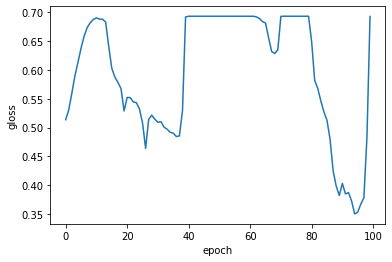

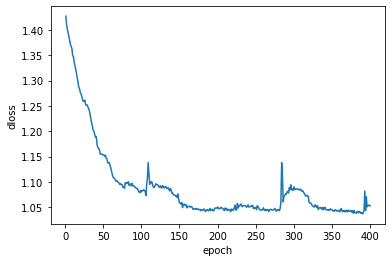

In [933]:
train(datasets, EPOCHS)